## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

### Loading Dataset

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/EE_Analysis.csv")
data.shape  

(721, 21)

## Exploratory Data Analysis

In [3]:
# Counting Number of Attrition.
Attrition_dictribution = data["Attrition"].value_counts()
Attrition_dictribution

No     639
Yes     82
Name: Attrition, dtype: int64

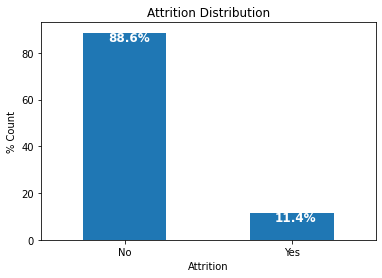

In [4]:
ax = (data['Attrition'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('Attrition')
ax.set_ylabel('% Count')
ax.set_title('Attrition Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

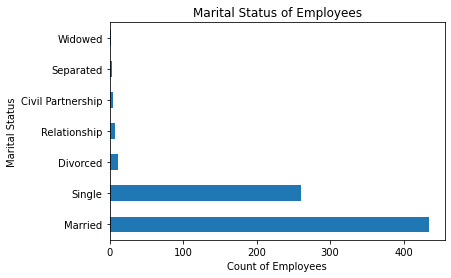

In [5]:
# Let's calculate the percentage of Martial Status of Employess.
data['Marital Status'].value_counts()

#plot the bar graph of categories
data['Marital Status'].value_counts().plot.barh()
plt.title("Marital Status of Employees")
plt.xlabel("Count of Employees")
plt.ylabel("Marital Status")
plt.show()

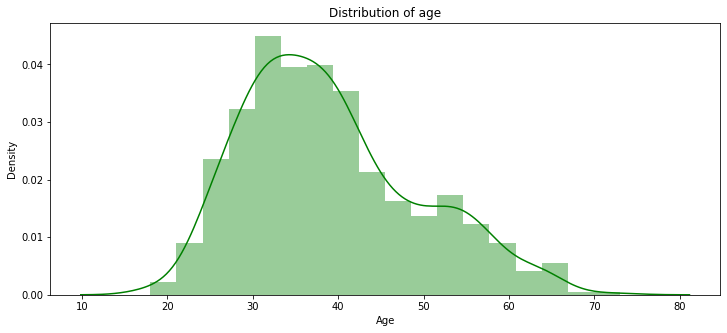

In [6]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["Age"], color = 'g')

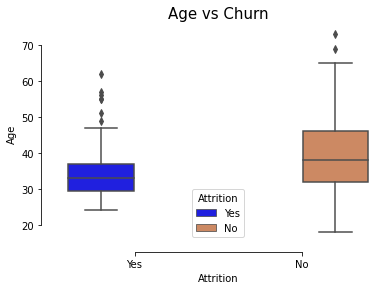

In [7]:
sns.boxplot(x="Attrition", y="Age",
            hue="Attrition", palette=["b", "#DD8452"],
            data=data).set_title("Age vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

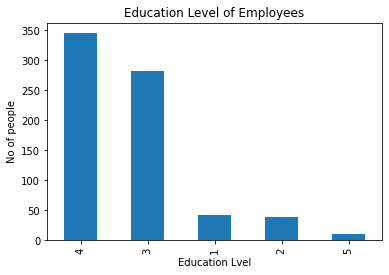

In [8]:
# Let's calculate the percentage of employee wrt education.
data['Education Level'].value_counts()

#plot the bar graph of percentage categories
data['Education Level'].value_counts().plot.bar()
plt.title("Education Level of Employees")
plt.xlabel("Education Lvel")
plt.ylabel("No of people")
plt.show()

In [9]:
# Gender Distribution Among employees.
gender_dictribution = data["Gender"].value_counts()
gender_dictribution

Female    373
Male      348
Name: Gender, dtype: int64

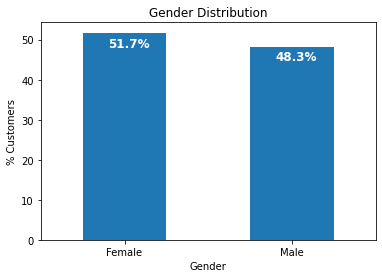

In [10]:
ax = (data['Gender'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Back Office             301
Front Office            258
Controlled Functions    162
Name: Business Functions, dtype: int64


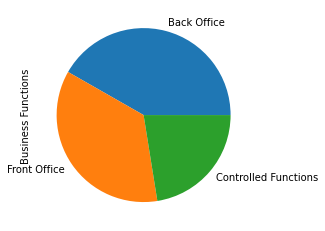

In [11]:
# Let's calculate the percentage of Business category.
data['Business Functions'].value_counts()
func_dict = data["Business Functions"].value_counts()
print(func_dict)

#plot the bar graph of percentage categories
data['Business Functions'].value_counts().plot.pie()
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Back Office'),
  Text(1, 0, 'Controlled Functions'),
  Text(2, 0, 'Front Office')])

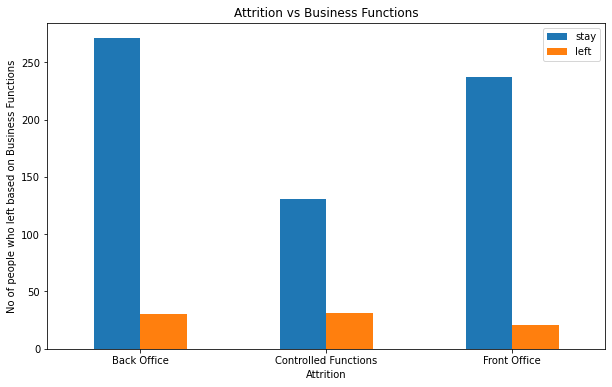

In [12]:
# Count of People left wrt Business functions.
pd.crosstab(data['Business Functions'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Business Functions")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Business Functions")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

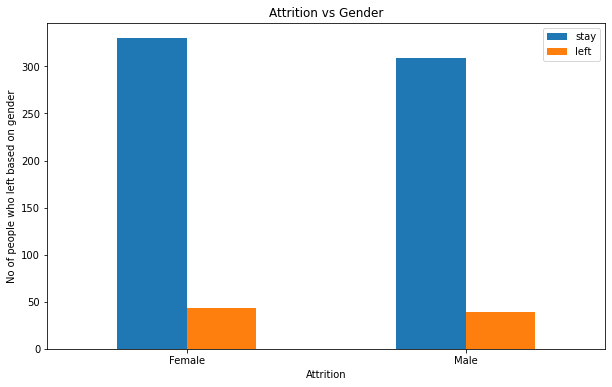

In [13]:
# Count of People left wrt Gender.
pd.crosstab(data['Gender'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

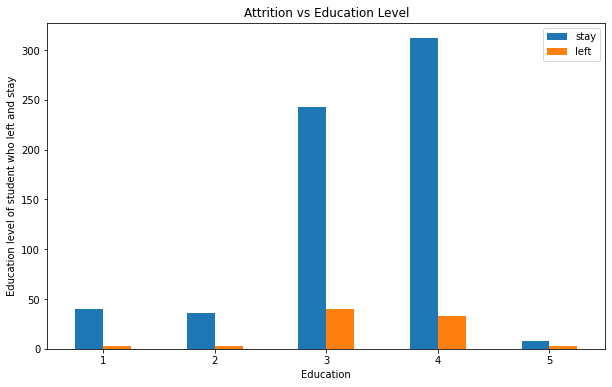

In [14]:
# Count of People left wrt Education level.
pd.crosstab(data['Education Level'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Education Level")
plt.xlabel("Education")
plt.ylabel("Education level of student who left and stay")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

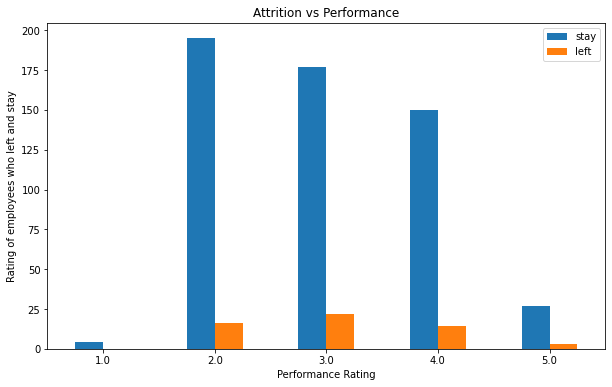

In [15]:
# Count of People left wrt Ratings.
pd.crosstab(data['Performance Rating'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Performance")
plt.xlabel("Performance Rating")
plt.ylabel("Rating of employees who left and stay")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

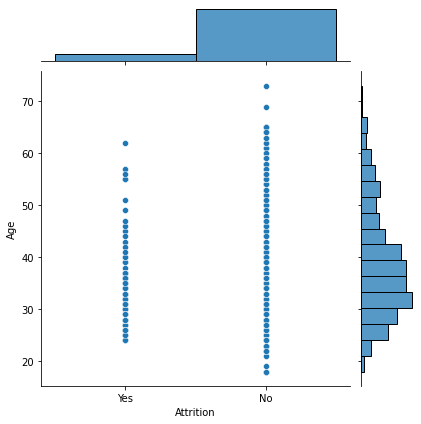

In [16]:
sns.jointplot(x='Attrition',y='Age',data=data)

(array([0, 1]), [Text(0, 0, 'No  '), Text(1, 0, 'Yes')])

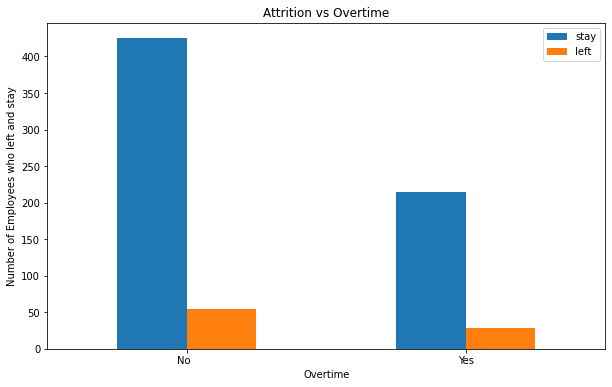

In [17]:
pd.crosstab(data['Overtime'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Overtime")
plt.xlabel("Overtime")
plt.ylabel("Number of Employees who left and stay")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Attrition_numeric', ylabel='Ethnic Origin'>

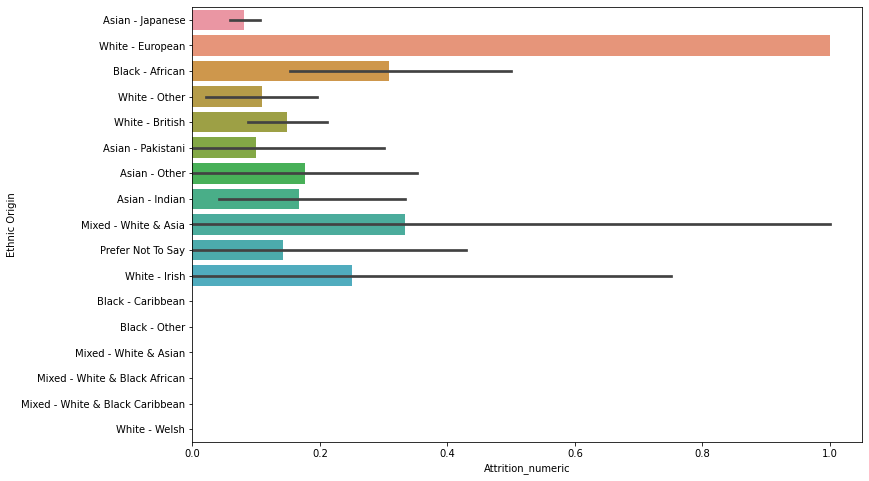

In [18]:
data.Attrition_numeric = data.Attrition
data.loc[data.Attrition == 'Yes','Attrition_numeric'] = 1
data.loc[data.Attrition == 'No','Attrition_numeric'] = 0

plt.figure(figsize=(12,8))
sns.barplot(y = 'Ethnic Origin', x = 'Attrition_numeric', data=data)

<AxesSubplot:xlabel='Marital Status', ylabel='Attrition_numeric'>

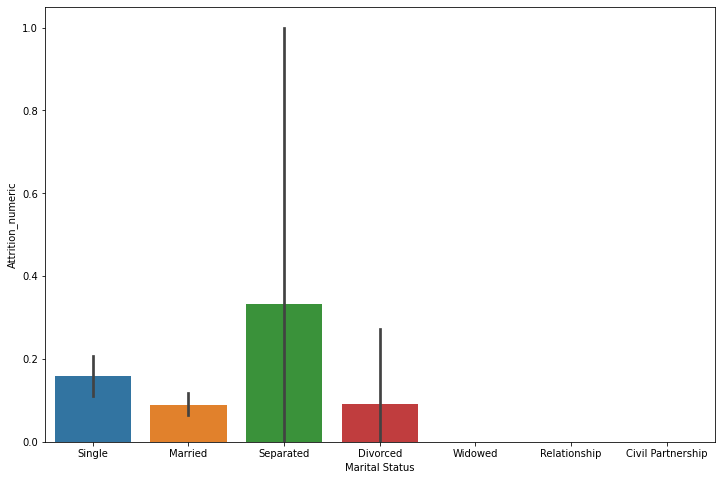

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Marital Status', y = 'Attrition_numeric', data=data)

<AxesSubplot:xlabel='Internal Transfer Opportunities', ylabel='count'>

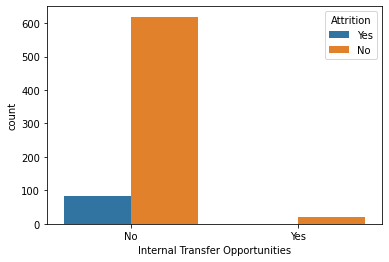

In [20]:
# Count of People left wrt Transfers.
sns.countplot(x = 'Internal Transfer Opportunities', hue = 'Attrition', data = data)

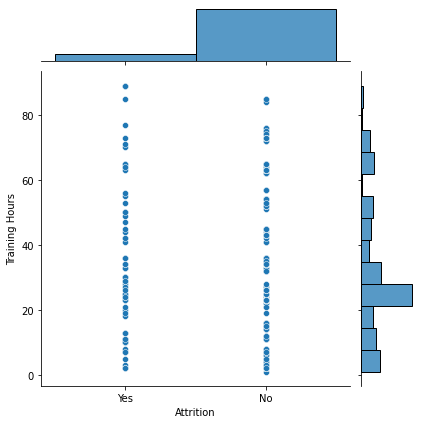

In [21]:
sns.jointplot(x='Attrition',y='Training Hours',data=data)

## Train Test Split Dataset

In [22]:
X = data.loc[:, data.columns != 'Attrition']
y = data[['Attrition']]

In [23]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
trainX = trainX.reset_index(drop=True)
testX = testX.reset_index(drop=True)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)


(504, 21)
(504, 1)
(217, 21)
(217, 1)


## Data Pre-Processing

In [24]:
# Counting Number of Attrition.
Attrition_dictribution = testy.value_counts()
Attrition_dictribution

Attrition
No           193
Yes           24
dtype: int64

In [25]:
trainX.head()

,Staff ID,Department,Grade,Age,Length of Total Service,Business Functions,Marital Status,Job Title,Location,Gender,...,Ethnicity,Education Level,Internal Transfer Opportunities,Performance Rating,Salary,Overtime,Resignation Reason,DaysSinceLastPromotion,Training Hours,Attrition_numeric
0,438,BD,2,34,4y,Front Office,Single,Associate,LD,Female,...,Local - Japanese,3,No,3.0,285600.8,No,NaN,1474,57.0,0.0
1,257,WE,4,39,15y 6m,Front Office,Married,VP - Marketing & Loans,CN,Male,...,Local - Japanese,3,No,4.0,510297.0,No,NaN,852,14.0,0.0
2,167,ITCE,3,50,3y 5m,Back Office,Married,Technical Manager,LD,Male,...,Local - Japanese,3,No,2.0,350000.0,No,NaN,364,26.0,0.0
3,89,LCS,3,36,11m,Controlled Functions,Married,AVP - Legal,LD,Female,...,Local - Other,4,No,NaN,650000.0,No,Career Development,181,NaN,1.0
4,450,GA,1,32,3y 9m,Back Office,Married,Sen Assistant - GA Coordinator,LD,Female,...,Local - Japanese,4,No,2.0,334090.8,Yes,NaN,730,NaN,0.0


In [26]:
trainX.describe()

,Staff ID,Grade,Age,Education Level,Performance Rating,Salary,DaysSinceLastPromotion,Training Hours,Attrition_numeric
count,504.000000,504.000000,504.000000,504.000000,423.000000,5.040000e+02,504.000000,311.000000,504.000000
mean,397.138889,2.621032,39.109127,3.355159,3.002364,5.244504e+05,778.015873,31.755627,0.115079
std,211.274869,1.103597,9.963252,0.823881,0.922337,3.236602e+05,753.783055,21.081671,0.319435
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.774500e+05,0.000000,2.000000,0.000000
25%,216.500000,2.000000,31.000000,3.000000,2.000000,3.000000e+05,220.750000,16.000000,0.000000
50%,400.500000,3.000000,38.000000,3.000000,3.000000,4.200000e+05,469.500000,25.000000,0.000000
75%,579.500000,3.000000,45.000000,4.000000,4.000000,6.500000e+05,1095.000000,45.000000,0.000000
max,756.000000,5.000000,69.000000,5.000000,5.000000,2.000000e+06,2921.000000,89.000000,1.000000


In [27]:
trainX.dtypes

Staff ID                             int64
Department                          object
Grade                                int64
Age                                  int64
Length of Total Service             object
Business Functions                  object
Marital Status                      object
Job Title                           object
Location                            object
Gender                              object
Ethnic Origin                       object
Ethnicity                           object
Education Level                      int64
Internal Transfer Opportunities     object
Performance Rating                 float64
Salary                             float64
Overtime                            object
Resignation Reason                  object
DaysSinceLastPromotion               int64
Training Hours                     float64
Attrition_numeric                  float64
dtype: object

Below fucntion will perform all the preprocessing required for this data such as mapping, converting and dropping irrelavant columns

In [28]:
def pre_process(data):
    data['Internal Transfer Opportunities'] = data['Internal Transfer Opportunities'].map({'No':0 , 'Yes': 1})
    data['Internal Transfer Opportunities'] = pd.to_numeric(data['Internal Transfer Opportunities'])
    data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
    data['Gender'] = pd.to_numeric(data['Gender'])
    data['Overtime'] = data['Overtime'].map({'Yes': 1, 'No  ': 0})
    data['Overtime'] = pd.to_numeric(data['Overtime'])
    data['Ethnicity'] = data['Ethnicity'].map({'Local - Japanese': 1, 'Local - Other': 0})
    data['Ethnicity'] = pd.to_numeric(data['Ethnicity'])

    for i in range(len(data['Length of Total Service'])):
        try:
            data.loc[i,'Length of Total Service'] = data.loc[i,'Length of Total Service'].split('y')[0]
        #print(data.loc[i,'Length of Total Service'])
        except:
            pass
    #print(data['Length of Total Service'].unique())

    data['Length of Total Service'] = data['Length of Total Service'].str.replace('6m', '0.6')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('5m', '0.5')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('9m', '0.9')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('2m', '0.2')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('8m', '0.8')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('3m', '0.3')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('11m', '0.95')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('10m', '0.9')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('7m', '0.7')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('4m', '0.4')
    data['Length of Total Service'] = data['Length of Total Service'].str.replace('1m', '0.1')
    data['Length of Total Service'] = pd.to_numeric(data['Length of Total Service'] , errors = "coerce")

    for i in range(len(data['Job Title'])):

        if "Associate" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Associate"
        
        if "Officer" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Officer"

        if "AVP" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "AVP"

        if "AVP" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "AVP"

        if "Assistant" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Assistant"
        
        if "Manager" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Manager"

        if "Clerk" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Clerk"

        if "Analyst" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Analyst"
        
        if "Analyst" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Analyst"
        
        if "VP" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "VP"
        
        if "Head" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Head"
            
        if "Senior" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Senior"

        if "Mgr" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Mgr"
        
        if "Trader" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Trader"

        if "Vice" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "VP"
        
        if "Sen" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Senior"
        
        if "Mngr" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Mgr"
        
        if "HOD" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Head"

        if "/" in data.loc[i,'Job Title']:
            data.loc[i,'Job Title'] = "Chief"
        
    data.drop('Staff ID',axis=1,inplace=True)
    data.drop('Resignation Reason',axis=1,inplace=True)
    data.drop('Ethnic Origin',axis=1,inplace=True)
    #data.drop('Attrition_numeric',axis=1,inplace=True)

    return data

Implementing Above function on TrainX and TestX data so it will get pre-processed.

In [29]:
trainX= pre_process(trainX)

In [30]:
testX = pre_process(testX)

Removing Null Values from data.

In [31]:
trainX.isna().sum()

Department                           0
Grade                                0
Age                                  0
Length of Total Service              8
Business Functions                   0
Marital Status                       0
Job Title                            0
Location                             0
Gender                               0
Ethnicity                            0
Education Level                      0
Internal Transfer Opportunities      0
Performance Rating                  81
Salary                               0
Overtime                             0
DaysSinceLastPromotion               0
Training Hours                     193
Attrition_numeric                    0
dtype: int64

Below function will drop values and replace it with mean and median values.

In [32]:
def missing_values(data):
    data['Performance Rating'] = data['Performance Rating'].fillna((data['Performance Rating'].median()))
    data['Training Hours'] = data['Training Hours'].fillna((data['Training Hours'].median()))
    data['Length of Total Service'] = data['Length of Total Service'].fillna((data['Length of Total Service'].mean()))

    mv_pr = (data['Performance Rating'].median())
    mv_th = (data['Training Hours'].median())
    mv_lts = (data['Length of Total Service'].mean())

    return mv_pr, mv_th, mv_lts, data

In [33]:
mv_pr, mv_th, mv_lts, trainX = missing_values(trainX)

In [34]:
testX['Performance Rating'] = testX['Performance Rating'].fillna(mv_pr)
testX['Training Hours'] = testX['Training Hours'].fillna(mv_th)
testX['Length of Total Service'] = testX['Length of Total Service'].fillna(mv_lts)

In [35]:
trainX.isna().sum()      # checking null values for trainX

Department                         0
Grade                              0
Age                                0
Length of Total Service            0
Business Functions                 0
Marital Status                     0
Job Title                          0
Location                           0
Gender                             0
Ethnicity                          0
Education Level                    0
Internal Transfer Opportunities    0
Performance Rating                 0
Salary                             0
Overtime                           0
DaysSinceLastPromotion             0
Training Hours                     0
Attrition_numeric                  0
dtype: int64

In [36]:
testX.isna().sum()        

Department                         0
Grade                              0
Age                                0
Length of Total Service            0
Business Functions                 0
Marital Status                     0
Job Title                          0
Location                           0
Gender                             0
Ethnicity                          0
Education Level                    0
Internal Transfer Opportunities    0
Performance Rating                 0
Salary                             0
Overtime                           0
DaysSinceLastPromotion             0
Training Hours                     0
Attrition_numeric                  0
dtype: int64

In [37]:
testy.columns

Index(['Attrition'], dtype='object')

In [38]:
testy['Attrition'] = testy['Attrition'].map({'Yes': 1, 'No': 0})

In [39]:
testy['Attrition'] = pd.to_numeric(testy['Attrition'])

In [40]:
trainy['Attrition'] = trainy['Attrition'].map({'Yes': 1, 'No': 0})

In [41]:
trainy['Attrition'] = pd.to_numeric(trainy['Attrition'])

### One Hot Encoding Dataset.

In [42]:
trainX = pd.get_dummies(trainX)
trainX.dtypes

Grade                        int64
Age                          int64
Length of Total Service    float64
Gender                       int64
Ethnicity                    int64
                            ...   
Location_CN                  uint8
Location_ED                  uint8
Location_GB                  uint8
Location_LD                  uint8
Location_MB                  uint8
Length: 75, dtype: object

In [43]:
testX = pd.get_dummies(testX)
testX.dtypes

Grade                        int64
Age                          int64
Length of Total Service    float64
Gender                       int64
Ethnicity                    int64
                            ...   
Location_CN                  uint8
Location_ED                  uint8
Location_GB                  uint8
Location_LD                  uint8
Location_MB                  uint8
Length: 78, dtype: object

Making columns of both trainX and TestX equals if not.

In [44]:
missing_cols = set(trainX.columns) - set(testX.columns)
for c in missing_cols: 
    testX[c] = 0
testX = testX[trainX.columns]


## Applying Machine Learning Models

### Logistic Regression

K-fold cross-validation
-  Systematically create "K" train/test splits and average the results together
-  Even better estimate of out-of-sample performance
-  Using 5*5 Kfold Cross Validation for predicting possible accuracies of model.

[0.89108911 0.88118812 0.88118812 0.88118812 0.89      ]
Accuracy (Logistic Regression) KFold with k=5: 88.49%
[[446   0]
 [ 58   0]]


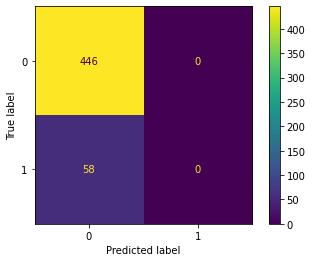

In [45]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
lr = LogisticRegression(solver='liblinear',random_state= 10)

results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Logistic Regression) KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [46]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [ 24   0]]
------------------------------------
AUC Score: 0.5
------------------------------------
Accuracy of Logistic Regression: 88.94009216589862 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.89       217
   macro avg       0.44      0.50      0.47       217
weighted avg       0.79      0.89      0.84       217



### Random Forest Classifier

[1.         0.98019802 0.97029703 1.         0.97      ]
Accuracy  KFold with k=5: 98.41%
[[446   0]
 [  4  54]]


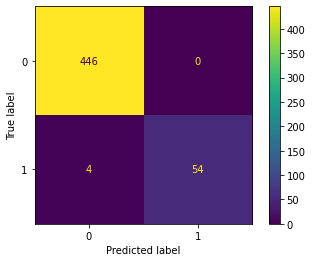

In [48]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 100)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [49]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 720)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Gradient Boosting Classifier

[1. 1. 1. 1. 1.]
Accuracy  KFold with k=5: 100.00%
[[446   0]
 [  0  58]]


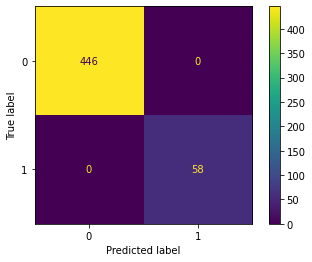

In [51]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [52]:
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=5, n_estimators=700)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### XGBoost Classifier

[1. 1. 1. 1. 1.]
Accuracy  KFold with k=5: 100.00%
[[446   0]
 [  0  58]]


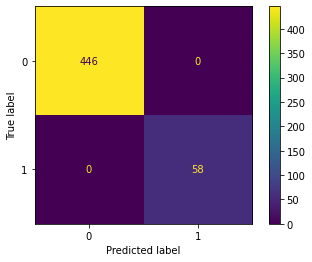

In [54]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(xgb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [55]:
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 4)
xgb.fit(trainX,trainy.values.ravel())
y_pred = xgb.predict(testX)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of XGBOOST:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of XGBOOST: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Decision Tree Classifier

[1. 1. 1. 1. 1.]
Accuracy  KFold with k=5: 100.00%
[[446   0]
 [  0  58]]


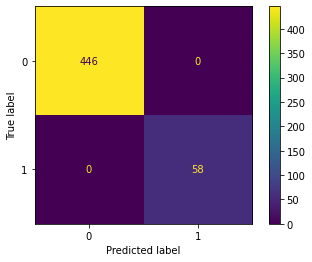

In [57]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [58]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Decision Tree: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Support Vector Machine

[0.89108911 0.88118812 0.88118812 0.88118812 0.89      ]
Accuracy  KFold with k=5: 88.49%
[[446   0]
 [ 58   0]]


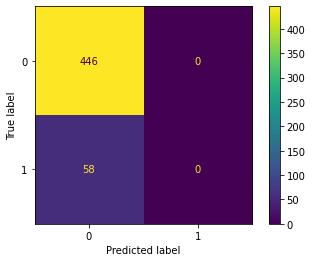

In [60]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

svm = SVC()
results_kfold = cross_val_score(svm, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(svm, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [61]:
svm = SVC()
svm.fit(trainX,trainy.values.ravel())
y_pred = svm.predict(testX)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = svm.score(testX, testy)
print("Accuracy of SVM:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [ 24   0]]
------------------------------------
AUC Score: 0.5
------------------------------------
Accuracy of SVM: 88.94009216589862 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.89       217
   macro avg       0.44      0.50      0.47       217
weighted avg       0.79      0.89      0.84       217



### KNN Classifier

[0.88118812 0.88118812 0.87128713 0.88118812 0.89      ]
Accuracy  KFold with k=5: 88.10%
[[444   2]
 [ 58   0]]


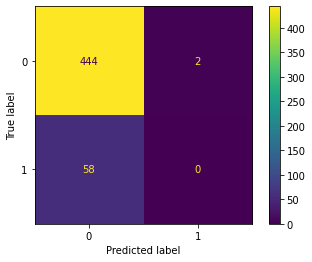

In [63]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
results_kfold = cross_val_score(knn, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(knn, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [64]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[191   2]
 [ 24   0]]
------------------------------------
AUC Score: 0.4948186528497409
------------------------------------
Accuracy of KNN Classifier: 88.0184331797235 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 0.9896373056994818
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.010362694300518135
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.88       217
   macro avg       0.44      0.49      0.47       217
weighted avg       0.79      0.88      0.83       217



### Naive Bayes Classifier

[0.57425743 0.52475248 0.55445545 0.54455446 0.47      ]
Accuracy  KFold with k=5: 53.36%
[[230 216]
 [ 19  39]]


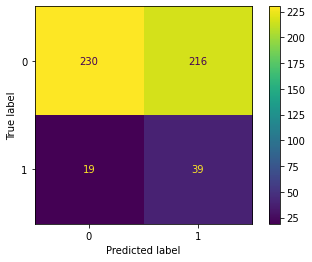

In [66]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

NB = MultinomialNB()
results_kfold = cross_val_score(NB, trainX, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy  KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(NB, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [67]:
NB = MultinomialNB()
NB.fit(trainX,trainy.values.ravel())
y_pred = NB.predict(testX)

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of Naive Bayes Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[98 95]
 [10 14]]
------------------------------------
AUC Score: 0.545552677029361
------------------------------------
Accuracy of Naive Bayes Classifier: 51.61290322580645 %
------------------------------------
Recall: 0.5833333333333334
------------------------------------
Precision: 0.12844036697247707
------------------------------------
Specificity: 0.5077720207253886
------------------------------------
Sensitivity: 0.5833333333333334
------------------------------------
Miss Rate (False Positive Rate): 0.49222797927461137
------------------------------------
Miss Rate (False Negative Rate): 0.4166666666666667
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       193
           1       0.13      0.58      0.21        24

    accuracy                           0.52       217
   macro avg       0.52      0.55      0.43       217
weighted avg       0.82      0.52      0.60       217



### Voting Classifier***

In [69]:
r0 = GradientBoostingClassifier(learning_rate = 0.15,max_depth=3,n_estimators=100)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 720)
r2 = XGBClassifier(learning_rate = 0.75, max_depth = 15)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX,trainy.values.ravel())
y_pred_voting = voting.predict(testX)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[98 95]
 [10 14]]
------------------------------------
AUC Score: 0.545552677029361
------------------------------------
Accuracy of voting Classifier: 100.0 %
------------------------------------
Recall: 0.5833333333333334
------------------------------------
Precision: 0.12844036697247707
------------------------------------
Specificity: 0.5077720207253886
------------------------------------
Sensitivity: 0.5833333333333334
------------------------------------
Miss Rate (False Positive Rate): 0.49222797927461137
------------------------------------
Miss Rate (False Negative Rate): 0.4166666666666667
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       193
           1       0.13      0.58      0.21        24

    accuracy                           0.52       217
   macro avg       0.52      0.55      0.43       217
weighted avg       0.82      0.52      0.60       217



## Applying Sampling Technique

Data Before doing OverSampling

<AxesSubplot:ylabel='None'>

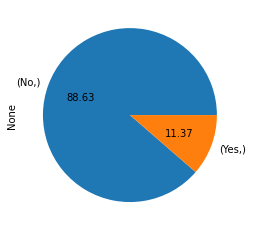

In [71]:
y.value_counts().plot.pie(autopct='%.2f')

Implementing OverSampling

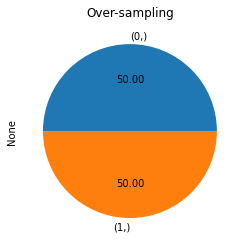

In [72]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train, y_train = ros.fit_resample(trainX, trainy)

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

## Applying Machine Learning Model After Sampling

### Logistic Regression (After Sampling)

[0.98324022 1.         1.         1.         1.        ]
Accuracy (Logistic Regression) KFold with k=5: 99.66%
[[446   0]
 [  3 443]]


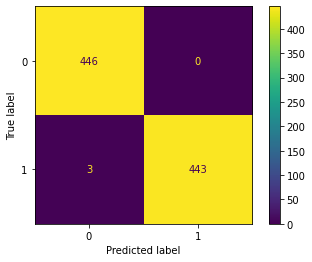

In [73]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
lr = LogisticRegression(solver='liblinear',random_state= 10)

results_kfold = cross_val_score(lr, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Logistic Regression) KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(lr, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [74]:
lr = LogisticRegression()
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(testX)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

Confusion Matrix:
[[110  83]
 [ 11  13]]
------------------------------------
AUC Score: 0.555807426597582
------------------------------------
Accuracy of Logistic Regression: 56.68202764976959 %
------------------------------------
Recall: 0.5416666666666666
------------------------------------
Precision: 0.13541666666666666
------------------------------------
Specificity: 0.5699481865284974
------------------------------------
Sensitivity: 0.5416666666666666
------------------------------------
Miss Rate (False Positive Rate): 0.43005181347150256
------------------------------------
Miss Rate (False Negative Rate): 0.4583333333333333
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       193
           1       0.14      0.54      0.22        24

    accuracy                           0.57       217
   macro avg       0.52      0.56      0.46       217
weighted avg       0.82      0.57      0.65       217



### Decision Tree Classifier

[1. 1. 1. 1. 1.]
Accuracy (Desicion Tree) KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


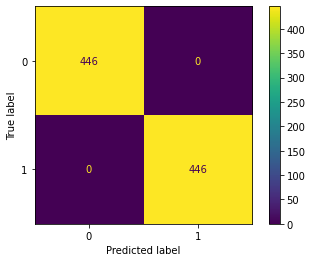

In [76]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
DT = DecisionTreeClassifier(max_depth=100)

results_kfold = cross_val_score(DT, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Desicion Tree) KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [77]:
DT = DecisionTreeClassifier(max_depth=200)
DT.fit(X_train,y_train)
y_pred = DT.predict(testX) 

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Decision Tree: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Random Forest Classifier (After Sampling)**

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


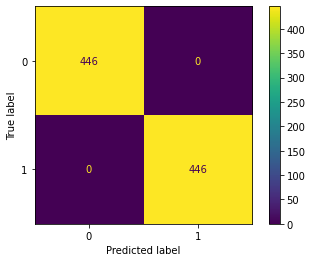

In [79]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
rf = RandomForestClassifier(max_depth=10,n_estimators = 1000)

results_kfold = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [80]:
rf = RandomForestClassifier(max_depth=5,n_estimators = 700)
rf.fit(X_train,y_train.values.ravel())
y_pred = rf.predict(testX)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  1  23]]
------------------------------------
AUC Score: 0.9791666666666667
------------------------------------
Accuracy of Random Forest: 99.53917050691244 %
------------------------------------
Recall: 0.9583333333333334
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.9583333333333334
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.041666666666666664
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      0.96      0.98        24

    accuracy                           1.00       217
   macro avg       1.00      0.98      0.99       217
weighted avg       1.00      1.00      1.00       217



### XGBoost Classifier (After Sampling)**

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


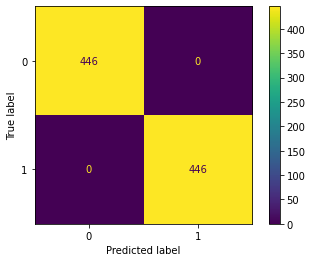

In [82]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)

results_kfold = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [83]:
xgb = XGBClassifier(learning_rate = 0.85, max_depth = 3)
xgb.fit(X_train,y_train.values.ravel())
y_pred = xgb.predict(testX)

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of xgboost:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of xgboost: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Support Vector Machine (After Sampling)

[1.         1.         0.99438202 1.         1.        ]
Accuracy KFold with k=10: 99.89%
[[445   1]
 [  0 446]]


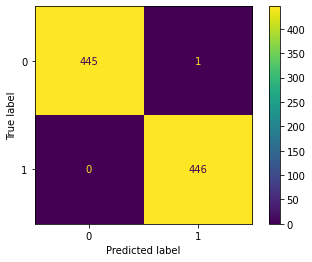

In [85]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
svm = SVC(gamma = 'auto')

results_kfold = cross_val_score(svm, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(svm, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [86]:
svm = SVC(gamma = 'auto')
svm.fit(X_train,y_train.values.ravel())
y_pred = svm.predict(testX)

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = svm.score(testX, testy)
print("Accuracy of SVM:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [ 24   0]]
------------------------------------
AUC Score: 0.5
------------------------------------
Accuracy of SVM: 88.94009216589862 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.89       217
   macro avg       0.44      0.50      0.47       217
weighted avg       0.79      0.89      0.84       217



### Naive Bayes Classifier

[0.62011173 0.59776536 0.60674157 0.57865169 0.57865169]
Accuracy KFold with k=10: 59.64%
[[230 216]
 [144 302]]


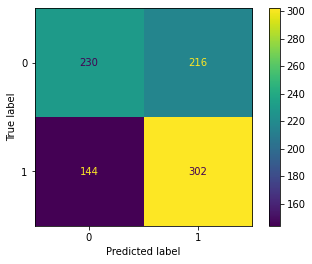

In [88]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
NB = MultinomialNB()

results_kfold = cross_val_score(NB, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(NB, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [89]:
NB = MultinomialNB()
NB.fit(X_train,y_train.values.ravel())
y_pred = NB.predict(testX)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX, testy)
print("Accuracy of NB:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[98 95]
 [10 14]]
------------------------------------
AUC Score: 0.545552677029361
------------------------------------
Accuracy of NB: 51.61290322580645 %
------------------------------------
Recall: 0.5833333333333334
------------------------------------
Precision: 0.12844036697247707
------------------------------------
Specificity: 0.5077720207253886
------------------------------------
Sensitivity: 0.5833333333333334
------------------------------------
Miss Rate (False Positive Rate): 0.49222797927461137
------------------------------------
Miss Rate (False Negative Rate): 0.4166666666666667
              precision    recall  f1-score   support

           0       0.91      0.51      0.65       193
           1       0.13      0.58      0.21        24

    accuracy                           0.52       217
   macro avg       0.52      0.55      0.43       217
weighted avg       0.82      0.52      0.60       217



### KNN Classifier (After Sampling)

[0.80446927 0.74301676 0.80337079 0.87078652 0.8258427 ]
Accuracy KFold with k=10: 80.95%
[[295 151]
 [ 19 427]]


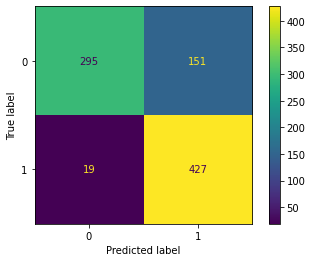

In [91]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
results_kfold = cross_val_score(knn, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(knn, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [92]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())
y_pred = knn.predict(testX)

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[126  67]
 [ 17   7]]
------------------------------------
AUC Score: 0.47225820379965455
------------------------------------
Accuracy of KNN: 61.29032258064516 %
------------------------------------
Recall: 0.2916666666666667
------------------------------------
Precision: 0.0945945945945946
------------------------------------
Specificity: 0.6528497409326425
------------------------------------
Sensitivity: 0.2916666666666667
------------------------------------
Miss Rate (False Positive Rate): 0.3471502590673575
------------------------------------
Miss Rate (False Negative Rate): 0.7083333333333334
              precision    recall  f1-score   support

           0       0.88      0.65      0.75       193
           1       0.09      0.29      0.14        24

    accuracy                           0.61       217
   macro avg       0.49      0.47      0.45       217
weighted avg       0.79      0.61      0.68       217



### Gradient Boosting Classifier (After Sampling)**

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


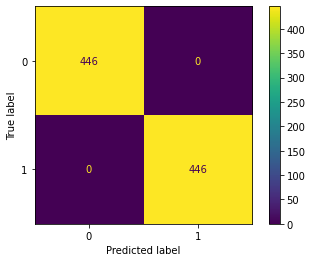

In [94]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [95]:
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=3, n_estimators=100)
gb.fit(X_train,y_train.values.ravel())
y_pred = gb.predict(testX)

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Gradient Boosting: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Voting Vlassifier (After Sampling)**

In [97]:
r0 = GradientBoostingClassifier(learning_rate = 0.15,max_depth=3,n_estimators=1200)
r1 = RandomForestClassifier(max_depth=5,n_estimators = 720)
r2 = XGBClassifier(learning_rate = 0.75, max_depth = 15)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(X_train,y_train.values.ravel())
y_pred_voting = voting.predict(testX)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred_voting)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred_voting)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX, testy)
print("Accuracy of Voting Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred_voting)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred_voting)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Voting Classifier: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



## Feature Selection Using Information Gain.

In [99]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(trainX, trainy.values.ravel())
mutual_info

array([1.25505372e-02, 1.18490042e-02, 1.58252596e-02, 5.07823940e-03,
       0.00000000e+00, 1.80400377e-03, 5.24803061e-03, 0.00000000e+00,
       6.18270906e-04, 2.37500597e-02, 4.08486395e-02, 9.56376056e-02,
       3.57999901e-01, 5.68709642e-03, 3.57639926e-03, 0.00000000e+00,
       1.53145246e-02, 2.86732565e-03, 2.31565931e-02, 2.09224473e-02,
       0.00000000e+00, 1.69715466e-02, 1.69701422e-02, 0.00000000e+00,
       1.47135570e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.29424084e-03, 0.00000000e+00, 2.94001367e-02, 2.03808110e-02,
       1.18481567e-02, 0.00000000e+00, 1.19428498e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.24384399e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92711795e-03,
       6.86208086e-03, 3.66491259e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.87381248e-03, 0.00000000e+00, 0.00000000e+00,
      

In [100]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = trainX.columns
mutual_info.sort_values(ascending=False)
# Checking Values of Mutual info with respect to features in sorted manner.

Attrition_numeric                          0.358000
Training Hours                             0.095638
DaysSinceLastPromotion                     0.040849
Location_MB                                0.032618
Department_FI                              0.029400
                                             ...   
Department_WE                              0.000000
Business Functions_Back Office             0.000000
Business Functions_Controlled Functions    0.000000
Business Functions_Front Office            0.000000
Department_ITCE                            0.000000
Length: 75, dtype: float64

<AxesSubplot:>

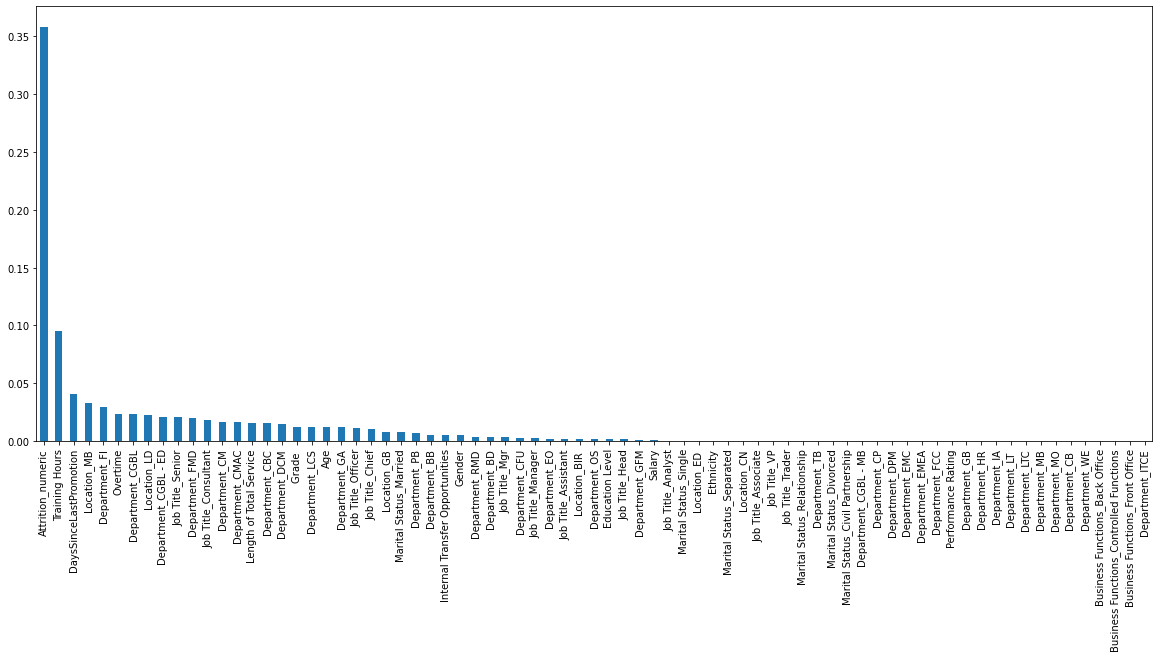

In [101]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [102]:
# Create and fit selector
selector = SelectKBest(mutual_info_classif, k=45)
selector.fit(trainX, trainy.values.ravel())
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
trainX_45 = trainX.iloc[:,cols]
testX_45 =testX.iloc[:,cols]

In [103]:
print(trainX_45.columns)

Index(['Grade ', 'Age', 'Length of Total Service', 'Ethnicity',
       'DaysSinceLastPromotion', 'Training Hours', 'Attrition_numeric',
       'Department_BB', 'Department_BD', 'Department_CB ', 'Department_CFU',
       'Department_CGBL - ED', 'Department_CM', 'Department_CMAC',
       'Department_CP', 'Department_EMC', 'Department_EMEA', 'Department_FCC',
       'Department_GA', 'Department_GB', 'Department_LCS', 'Department_LTC',
       'Department_MB', 'Department_OS', 'Department_PB',
       'Business Functions_Controlled Functions',
       'Marital Status_Civil Partnership', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Relationship',
       'Marital Status_Separated', 'Job Title_Analyst', 'Job Title_Head',
       'Job Title_Manager', 'Job Title_Mgr', 'Job Title_Officer',
       'Job Title_Senior', 'Job Title_Trader', 'Job Title_VP', 'Location_BIR ',
       'Location_CN', 'Location_ED ', 'Location_GB', 'Location_LD',
       'Location_MB'],
      dtype

## Applying Models After Feature Selection

### Logistic Regression (After Feature Selection)

[1.   1.   1.   1.   0.99]
Accuracy (Logistic Regression) KFold with k=5: 99.80%
[[446   0]
 [  1  57]]


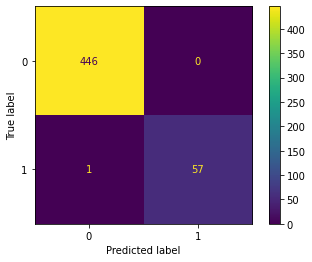

In [104]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
lr = LogisticRegression(solver='liblinear',random_state= 10)

results_kfold = cross_val_score(lr, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Logistic Regression) KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(lr, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [105]:
lr = LogisticRegression()
lr.fit(trainX_45,trainy.values.ravel())
y_pred = lr.predict(testX_45)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX_45, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Logistic Regression: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### XGBoost Classifier (After Feature Selection)**

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


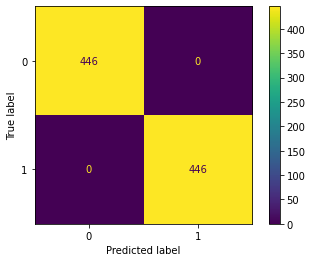

In [107]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
xgb = XGBClassifier(learning_rate = 0.75, max_depth = 5)

results_kfold = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(xgb, X_train, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [108]:
xgb = XGBClassifier(learning_rate = 0.19, max_depth = 3)
xgb.fit(X_train,y_train.values.ravel())
y_pred = xgb.predict(testX)

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = xgb.score(testX, testy)
print("Accuracy of xgboost:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of xgboost: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Decision Tree Classifier

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0  58]]


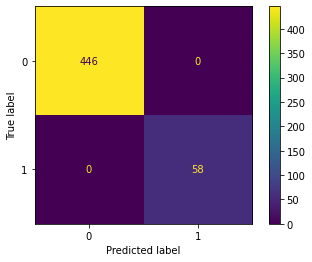

In [110]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=1100)
results_kfold = cross_val_score(DT, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [111]:
DT = DecisionTreeClassifier(max_depth=1100)
DT.fit(trainX_45,trainy.values.ravel())
y_pred = DT.predict(testX_45)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX_45, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Decision Tree: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Random Forest Classifier (Feature Selection)

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  1  57]]


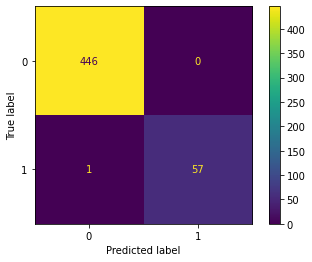

In [113]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1000)
results_kfold = cross_val_score(rf, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [114]:
rf = RandomForestClassifier(max_depth=30, n_estimators=150)
rf.fit(trainX_45,trainy.values.ravel())
y_pred = rf.predict(testX_45)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX_45, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Gradient Boosting Classifier (Feature Selection)**

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0  58]]


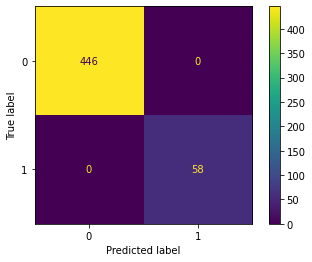

In [116]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=800)
results_kfold = cross_val_score(gb, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [117]:
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=3, n_estimators=100)
gb.fit(trainX_45,trainy.values.ravel())
y_pred = gb.predict(testX_45)

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX_45, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Gradient Boosting: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Support Vector Machine (After Feature Selection)

[0.89108911 0.88118812 0.87128713 0.88118812 0.89      ]
Accuracy KFold with k=5: 88.30%
[[445   1]
 [ 58   0]]


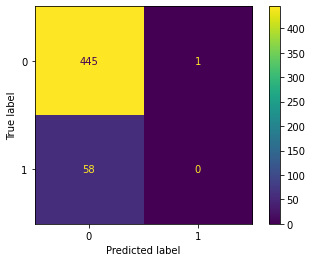

In [119]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
svm = SVC(gamma = 'auto')

results_kfold = cross_val_score(svm, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(svm, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [120]:
svm = SVC(gamma = 'auto')
svm.fit(trainX_45,trainy.values.ravel())
y_pred = svm.predict(testX_45)

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = svm.score(testX_45, testy)
print("Accuracy of SVM:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [ 24   0]]
------------------------------------
AUC Score: 0.5
------------------------------------
Accuracy of SVM: 88.94009216589862 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.89       217
   macro avg       0.44      0.50      0.47       217
weighted avg       0.79      0.89      0.84       217



### Naive Bayes Classifier (After Feature Selection)

[0.58415842 0.5049505  0.52475248 0.58415842 0.51      ]
Accuracy KFold with k=5: 54.16%
[[232 214]
 [ 17  41]]


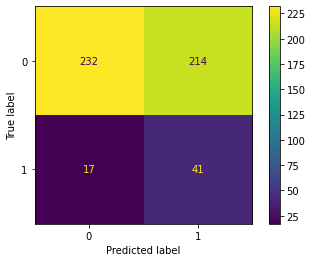

In [122]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
NB = MultinomialNB()

results_kfold = cross_val_score(NB, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(NB, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [123]:
NB = MultinomialNB()
NB.fit(trainX_45,trainy.values.ravel())
y_pred = NB.predict(testX_45)

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = NB.score(testX_45, testy)
print("Accuracy of NB:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[102  91]
 [  8  16]]
------------------------------------
AUC Score: 0.5975820379965457
------------------------------------
Accuracy of NB: 54.377880184331794 %
------------------------------------
Recall: 0.6666666666666666
------------------------------------
Precision: 0.14953271028037382
------------------------------------
Specificity: 0.5284974093264249
------------------------------------
Sensitivity: 0.6666666666666666
------------------------------------
Miss Rate (False Positive Rate): 0.47150259067357514
------------------------------------
Miss Rate (False Negative Rate): 0.3333333333333333
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       193
           1       0.15      0.67      0.24        24

    accuracy                           0.54       217
   macro avg       0.54      0.60      0.46       217
weighted avg       0.84      0.54      0.63       217



### KNN Classifier (After Feature Selection)

[0.88118812 0.85148515 0.83168317 0.88118812 0.87      ]
Accuracy KFold with k=5: 86.31%
[[435  11]
 [ 58   0]]


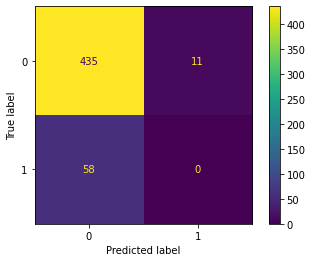

In [125]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=5)

results_kfold = cross_val_score(knn, trainX_45, trainy.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(knn, trainX_45, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [126]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX_45,trainy.values.ravel())
y_pred = knn.predict(testX_45)

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX_45, testy)
print("Accuracy of KNN:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[188   5]
 [ 23   1]]
------------------------------------
AUC Score: 0.5078799654576858
------------------------------------
Accuracy of KNN: 87.09677419354838 %
------------------------------------
Recall: 0.041666666666666664
------------------------------------
Precision: 0.16666666666666666
------------------------------------
Specificity: 0.9740932642487047
------------------------------------
Sensitivity: 0.041666666666666664
------------------------------------
Miss Rate (False Positive Rate): 0.025906735751295335
------------------------------------
Miss Rate (False Negative Rate): 0.9583333333333334
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       193
           1       0.17      0.04      0.07        24

    accuracy                           0.87       217
   macro avg       0.53      0.51      0.50       217
weighted avg       0.81      0.87      0.84       217



### Voting Classifier (After Feature Selection)

In [128]:
r0 = GradientBoostingClassifier(learning_rate = 0.01,max_depth=5,n_estimators=900)
r1 = RandomForestClassifier(max_depth=12,n_estimators = 1000)
r2 = XGBClassifier(learning_rate = 0.75, max_depth = 5)

# In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class
voting = VotingClassifier([('gb1', r0),('gb2', r1),('gb3', r2)], voting='soft')
voting.fit(trainX_45,trainy.values.ravel())
y_pred_voting = voting.predict(testX_45)

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = voting.score(testX_45, testy)
print("Accuracy of Voting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[188   5]
 [ 23   1]]
------------------------------------
AUC Score: 0.5078799654576858
------------------------------------
Accuracy of Voting: 100.0 %
------------------------------------
Recall: 0.041666666666666664
------------------------------------
Precision: 0.16666666666666666
------------------------------------
Specificity: 0.9740932642487047
------------------------------------
Sensitivity: 0.041666666666666664
------------------------------------
Miss Rate (False Positive Rate): 0.025906735751295335
------------------------------------
Miss Rate (False Negative Rate): 0.9583333333333334
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       193
           1       0.17      0.04      0.07        24

    accuracy                           0.87       217
   macro avg       0.53      0.51      0.50       217
weighted avg       0.81      0.87      0.84       217



## Feature Selection on Sampled Data

In [130]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train.values.ravel())
mutual_info

array([0.02087774, 0.12924429, 0.14694902, 0.        , 0.00915629,
       0.0365278 , 0.03300642, 0.02161934, 0.38286033, 0.        ,
       0.45510812, 0.29278561, 0.69370803, 0.01322136, 0.        ,
       0.        , 0.00247051, 0.        , 0.01041799, 0.        ,
       0.03678763, 0.02820933, 0.0319567 , 0.        , 0.        ,
       0.00467195, 0.00593949, 0.0049829 , 0.0207148 , 0.00280173,
       0.        , 0.        , 0.01390907, 0.00803374, 0.01955104,
       0.01731616, 0.        , 0.        , 0.02077723, 0.03471819,
       0.01988569, 0.        , 0.        , 0.03970473, 0.05060035,
       0.00334311, 0.        , 0.01202945, 0.00322469, 0.04044004,
       0.00421731, 0.        , 0.        , 0.02415941, 0.00689176,
       0.03386818, 0.01990287, 0.        , 0.        , 0.        ,
       0.03631092, 0.01735963, 0.01041494, 0.01571435, 0.02740717,
       0.01617068, 0.00280715, 0.        , 0.        , 0.        ,
       0.02609901, 0.02211601, 0.        , 0.01076058, 0.     

In [131]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Attrition_numeric          0.693708
DaysSinceLastPromotion     0.455108
Salary                     0.382860
Training Hours             0.292786
Length of Total Service    0.146949
                             ...   
Department_IA              0.000000
Department_MB              0.000000
Department_MO              0.000000
Department_TB              0.000000
Location_MB                0.000000
Length: 75, dtype: float64

<AxesSubplot:>

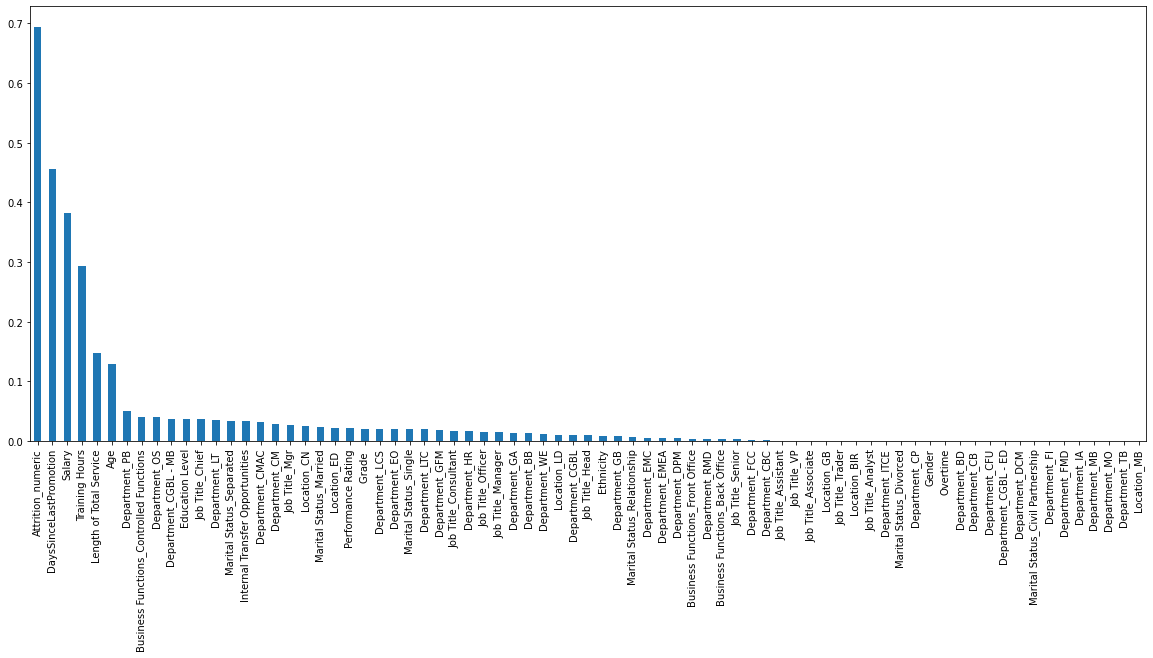

In [132]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [133]:
# Create and fit selector
selector = SelectKBest(mutual_info_classif, k=30)
selector.fit(X_train, y_train.values.ravel())
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
trainX_30 = X_train.iloc[:,cols]
testX_30 =testX.iloc[:,cols]

In [134]:
print(trainX_30.columns)

Index(['Grade ', 'Age', 'Length of Total Service', 'Gender', 'Ethnicity',
       'Education Level', 'Internal Transfer Opportunities',
       'Performance Rating', 'Salary', 'DaysSinceLastPromotion',
       'Training Hours', 'Attrition_numeric', 'Department_CGBL - MB',
       'Department_CM', 'Department_CMAC', 'Department_CP', 'Department_DCM',
       'Department_EMEA', 'Department_EO', 'Department_FCC', 'Department_FMD',
       'Department_LCS', 'Department_OS', 'Department_PB', 'Department_RMD',
       'Job Title_Officer', 'Job Title_VP', 'Location_BIR ', 'Location_CN',
       'Location_LD'],
      dtype='object')


## Applying ML Models on Balanced Data with Feature Engineering.

### Logistic Regression

[0.98324022 1.         1.         1.         1.        ]
Accuracy (Logistic Regression) KFold with k=5: 99.66%
[[446   0]
 [  3 443]]


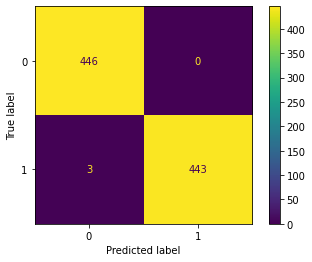

In [135]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)
lr = LogisticRegression(solver='liblinear',random_state= 10)

results_kfold = cross_val_score(lr, trainX_30, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy (Logistic Regression) KFold with k=5: %.2f%%" % (results_kfold.mean()*100.0))

pred = cross_val_predict(lr, trainX_30, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [136]:
lr = LogisticRegression()
lr.fit(trainX_30,y_train.values.ravel())
y_pred = lr.predict(testX_30)

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX_30, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[110  83]
 [ 11  13]]
------------------------------------
AUC Score: 0.555807426597582
------------------------------------
Accuracy of Logistic Regression: 56.68202764976959 %
------------------------------------
Recall: 0.5416666666666666
------------------------------------
Precision: 0.13541666666666666
------------------------------------
Specificity: 0.5699481865284974
------------------------------------
Sensitivity: 0.5416666666666666
------------------------------------
Miss Rate (False Positive Rate): 0.43005181347150256
------------------------------------
Miss Rate (False Negative Rate): 0.4583333333333333
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       193
           1       0.14      0.54      0.22        24

    accuracy                           0.57       217
   macro avg       0.52      0.56      0.46       217
weighted avg       0.82      0.57      0.65       217



### Decision Tree Classifier

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


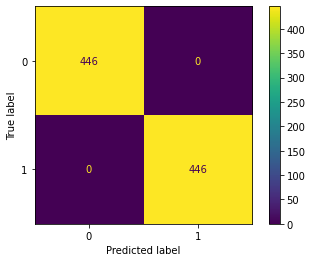

In [138]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=1100)
results_kfold = cross_val_score(DT, trainX_30, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX_30, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [139]:
DT = DecisionTreeClassifier(max_depth=1100)
DT.fit(trainX_30,y_train.values.ravel())
y_pred = DT.predict(testX_30)

In [140]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX_30, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Decision Tree: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Random Forest Classifier

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


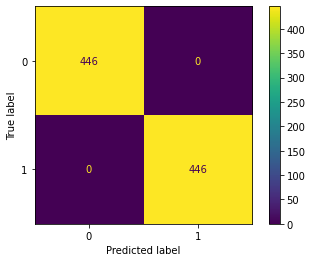

In [141]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1000)
results_kfold = cross_val_score(DT, trainX_30, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX_30, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [142]:
rf = RandomForestClassifier(max_depth=30, n_estimators=150)
rf.fit(trainX_30,y_train.values.ravel())
y_pred = rf.predict(testX_30)

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX_30, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Gradient Boosting Classifier

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


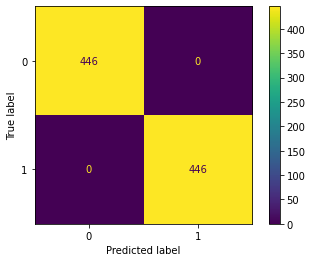

In [144]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=800)
results_kfold = cross_val_score(gb, trainX_30, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX_30, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [145]:
gb = GradientBoostingClassifier(learning_rate=0.15, max_depth=3, n_estimators=100)
gb.fit(trainX_30,y_train.values.ravel())
y_pred = gb.predict(testX_30)

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX_30, testy)
print("Accuracy of Gradient Boosting:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [  0  24]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Gradient Boosting: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        24

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Support Vector Machine

[1. 1. 1. 1. 1.]
Accuracy KFold with k=10: 100.00%
[[446   0]
 [  0 446]]


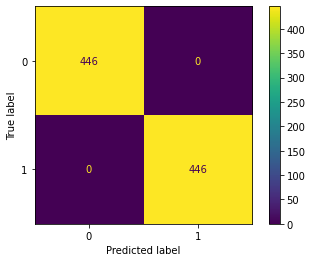

In [147]:
kfold = KFold(n_splits=5, random_state=100, shuffle=True)

svm = SVC(gamma = 'auto')
results_kfold = cross_val_score(svm, trainX_30, y_train.values.ravel(), cv=5)
print(results_kfold)
print("Accuracy KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(svm, trainX_30, y_train.values.ravel(), cv=5)
conf_mat = confusion_matrix(y_train, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(y_train,pred)

In [148]:
svm = SVC(gamma = 'auto')
svm.fit(trainX_30,y_train.values.ravel())
y_pred = svm.predict(testX_30)

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX_30, testy)
print("Accuracy of SVM:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

Confusion Matrix:
[[193   0]
 [ 24   0]]
------------------------------------
AUC Score: 0.5
------------------------------------
Accuracy of SVM: 100.0 %
------------------------------------
Recall: 0.0
------------------------------------
Precision: 0.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 1.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       193
           1       0.00      0.00      0.00        24

    accuracy                           0.89       217
   macro avg       0.44      0.50      0.47       217
weighted avg       0.79      0.89      0.84       217



## Predicting Attrition with Optimal Model

Implementing Random Forest model which we implemented earlier on sorted data.

In [182]:
rf = RandomForestClassifier(max_depth=5,n_estimators = 700)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=5, n_estimators=700)

In [151]:
xgb = XGBClassifier(learning_rate = 0.85, max_depth = 3)
xgb.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.85, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Doing batch prediction on which we will make predictions on evry record where Class is 0.

In [181]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:/Non_Churners.csv")
data.shape  

(639, 20)

In [153]:
random_samples = X.sample(10).reset_index(drop = True)

In [165]:
data.head()

,Staff ID,Department,Grade,Age,Length of Total Service,Business Functions,Marital Status,Job Title,Location,Gender,Ethnic Origin,Ethnicity,Education Level,Internal Transfer Opportunities,Performance Rating,Salary,Overtime,Resignation Reason,DaysSinceLastPromotion,Training Hours
0,118,LTC,3,31,10m,Front Office,Married,Senior Associate - Sales,LD,Female,Asian - Japanese,Local - Japanese,3,No,NaN,450000.0,Yes,NaN,333,19.0
1,119,CP,1,26,1y 10m,Back Office,Single,Junior Assistant,LD,Male,Asian - Japanese,Local - Japanese,4,No,2.0,285600.8,Yes,NaN,683,51.0
2,120,RMD,5,40,15y 3m,Controlled Functions,Married,Head of Research Centre,LD,Male,Asian - Japanese,Local - Japanese,4,No,2.0,1105823.2,No,NaN,991,NaN
3,121,ITCE,3,49,16y 11m,Back Office,Married,Tech.Mgr(Infrastructure&Syste),LD,Male,Asian - Japanese,Local - Japanese,4,No,3.0,341000.0,No,NaN,1674,NaN
4,122,ITCE,3,42,15y 11m,Back Office,Married,Technical Manager(Network),LD,Male,Asian - Japanese,Local - Japanese,3,No,2.0,295000.0,Yes,NaN,1340,32.0


In [183]:
def predicting_attrition(features):
    ids = features['Staff ID']
    features = pre_process(features)
    features['Performance Rating'] = features['Performance Rating'].fillna(mv_pr)
    features['Training Hours'] = features['Training Hours'].fillna(mv_th)
    features['Length of Total Service'] = features['Length of Total Service'].fillna(mv_lts)
    features = pd.get_dummies(features)
    missing_cols = set(trainX.columns) - set(features.columns)
    for c in missing_cols: 
        features[c] = 0
    features = features[trainX.columns]
    
    return ids, rf.predict(features)



### Predicting Attrition

Prediction Attrition of Employees Records we sampled from data above.

In [184]:
ids, x = predicting_attrition(data)

In [185]:
DF = pd.DataFrame(x, columns = ["prediction"])
full_data = pd.concat([ids,DF],axis = 1)

In [187]:
full_data.to_csv("E:/predictions.csv", index = False)